## Telecom Customers Churn

# Table of Contents

1. [Loading the Libraries and the Dataset](#1.-Loading-the-Libraries-and-the-Dataset)
    - 1.1. [Loading the Libraries](#1.1-Loading-the-Libraries)
    - 1.2. [Loading the Dataset](#1.2-Loading-the-Dataset)

2. [Data Preprocessing](#2.-Data-Preprocessing)
    - 2.1. [Statistical Analysis](#2.1-Statistical-Analysis)
    - 2.2. [Data Cleaning](#2.2-Data-Cleaning)
    - 2.3. [Handling the Outliers](#2.3-Handling-the-Outliers)

3. [Exploratory Data Analysis (EDA)](#3.-EDA)
    - 3.1. [Distribution of Numerical Features](#3.1-Distribution-of-Numerical-Features)
    - 3.2. [Distribution of Categorical Features](#3.2-Distribution-of-Categorical-Features)
    - 3.3. [Churn Rates by Categorical Features](#3.3-Churn-Rates-by-Categorical-Features)

4. [Feature Engineering and Augmentation](#4-Feature-Engineering-and-Augmentation)
    - 4.1. [Creating New Features](#4.1-Creating-New-Features)
    - 4.2. [Distribution Analysis of Augmented Features](#4.2-Distribution-Analysis-of-Augmented-Features)

5. [Correlation](#5-Correlation)
    - 5.1. [Correlation Matrix for Numerical Columns](#5.1-Correlation-Matrix-for-Numerical-Columns)
    - 5.2. [Chi-Square Test for Categorical Columns](#5.2-Chi-Square-Test-for-Categorical-Columns)

6. [Churn Rate Analysis and Data Imbalance](#6-Churn-Rate-Analysis-and-Data-Imbalance)

7. [Data Preparation](#7-Data-Preparation)

8. [Individual Model Implementations](#8-Individual-Model-Implementations)
    - 8.1. [Neural Network Model (NN) Implementation](#8.1-Neural-Network-Model-(NN)-Implementation)
    - 8.2. [XGBoost Model Implementation](#8.2-XGBoost-Model-Implementation)
    - 8.3. [Random Forest Model Implementation](#8.3-Random-Forest-Model-Implementation)
    - 8.4. [Plot of Model Accuracy Comparison](8.4.-Plot-of-Model-Accuracy-Comparison)

9. [Handling Class Imbalance Using SMOTE](#9-Handling-Class-Imbalance-Using-SMOTE)
    - 9.1. [Neural Network Model (NN) Implementation with SMOTE](#9.1-Neural-Network-Model-(NN)-Implementation-with-SMOTE)
    - 9.2. [XGBoost Model Implementation with SMOTE](#9.2-XGBoost-Model-Implementation-with-SMOTE)
    - 9.3. [Random Forest Model Implementation with SMOTE](#9.3-Random-Forest-Model-Implementation-with-SMOTE)
    - 9.4. [Model Accuracy Comparison After SMOTE](9.4.-Model-Accuracy-Comparison-After-SMOTE)


10. [Stacking to Enhance Model Performance](#10-Stacking-to-Enhance-Model-Performance)
    - 10.1. [Stacking Model without Deep Learning](#10.1-Stacking-Model-without-Deep-Learning)
    - 10.2. [Stacking Model with Deep Learning](#10.2-Stacking-Model-with-Deep-Learning)
    - 10.3 [Plot of Accuracy Comparison of Stacking Models](10.3-Plot-of-Accuracy-Comparison-of-Stacking-Models)

11.[Feature Importances](#11-Feature-Importances)

   - 11.1. [Extract Feature Importances](#11.1-Extract-Feature-Importances)

   - 11.2. [Retrieve Feature Names](#11.2-Retrieve-Feature-Names)

   - 11.3. [Plot Feature Importances](#11.3-Plot-Feature-Importances)

### 1. loading the libraries and the dataset

### 1.1 loading the libraries

In [ ]:
# Core libraries
import pandas as pd
import numpy as np
from google.colab import files
import io


# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing and scaling
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import KNNImputer

# Oversampling for imbalanced datasets
from imblearn.over_sampling import SMOTE

# Machine Learning models
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import lightgbm as lgb

# Deep Learning with Keras and TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Model persistence
import pickle
import joblib
from sklearn.exceptions import NotFittedError

# Validation curve (for hyperparameter tuning visualization)
from sklearn.model_selection import validation_curve


import joblib
import pickle
from sklearn.exceptions import NotFittedError
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


### 1.2 Read the data set

In [ ]:
#Upload the file to google colab

uploaded = files.upload()

Saving Telecom Customers Churn (1).csv to Telecom Customers Churn (1) (1).csv


In [ ]:
#Read the dataset
df = pd.read_csv(io.BytesIO(uploaded['Telecom Customers Churn (1) (1).csv']))
df = df.drop('customerID', axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### 2.1. Stastical *analysis*

In [ ]:
#Stastic Doscribe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


#### 2.2 Data Cleaning

In [ ]:
# Check for missing values in the dataframe with their percentage
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_values_percentage)

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [ ]:
df.shape

(7043, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# Categorical columns
df.describe(exclude='number').T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [ ]:
# Convert "TotalCharges" to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# Calculating the number and percentage of missing values
missing_values = pd.DataFrame({
    'Missing Values': df.isna().sum(),
    'Percentage of Total': df.isna().mean() * 100
})
missing_values

,Missing Values,Percentage of Total
gender,0,0.000000
SeniorCitizen,0,0.000000
Partner,0,0.000000
Dependents,0,0.000000
tenure,0,0.000000
PhoneService,0,0.000000
MultipleLines,0,0.000000
InternetService,0,0.000000
OnlineSecurity,0,0.000000
OnlineBackup,0,0.000000


In [ ]:
#Fill the missing value
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [ ]:
# Check for duplicate values in the dataframe
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 22


### 2.3 Handling the outliers

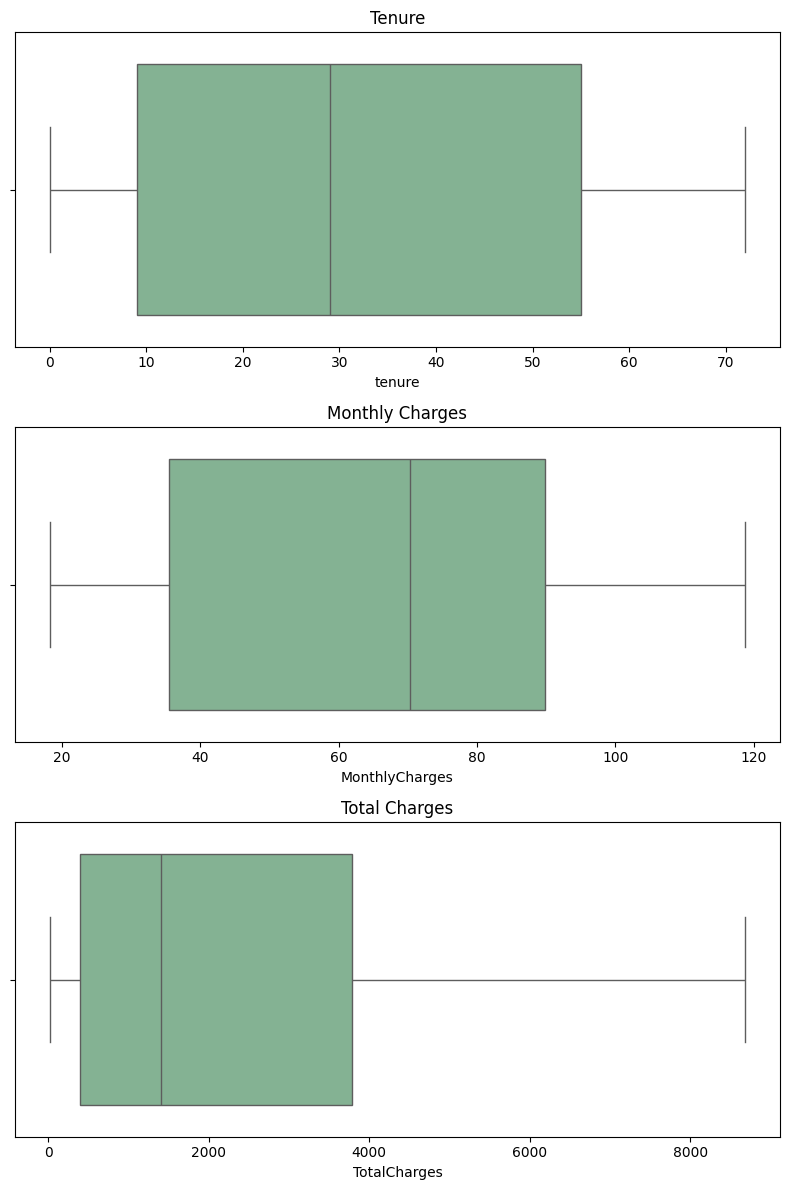

In [ ]:

# Select a single color from the "crest" palette to use consistently
single_color = sns.color_palette("crest")[0]

# Creating subplots for selected columns
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot each feature separately with a single color
sns.boxplot(data=df, x='tenure', ax=axes[0], color=single_color)
axes[0].set_title('Tenure')

sns.boxplot(data=df, x='MonthlyCharges', ax=axes[1], color=single_color)
axes[1].set_title('Monthly Charges')

sns.boxplot(data=df, x='TotalCharges', ax=axes[2], color=single_color)
axes[2].set_title('Total Charges')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the IQR (Interquartile Range) for relevant columns

# Define a function to detect and handle outliers based on IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df


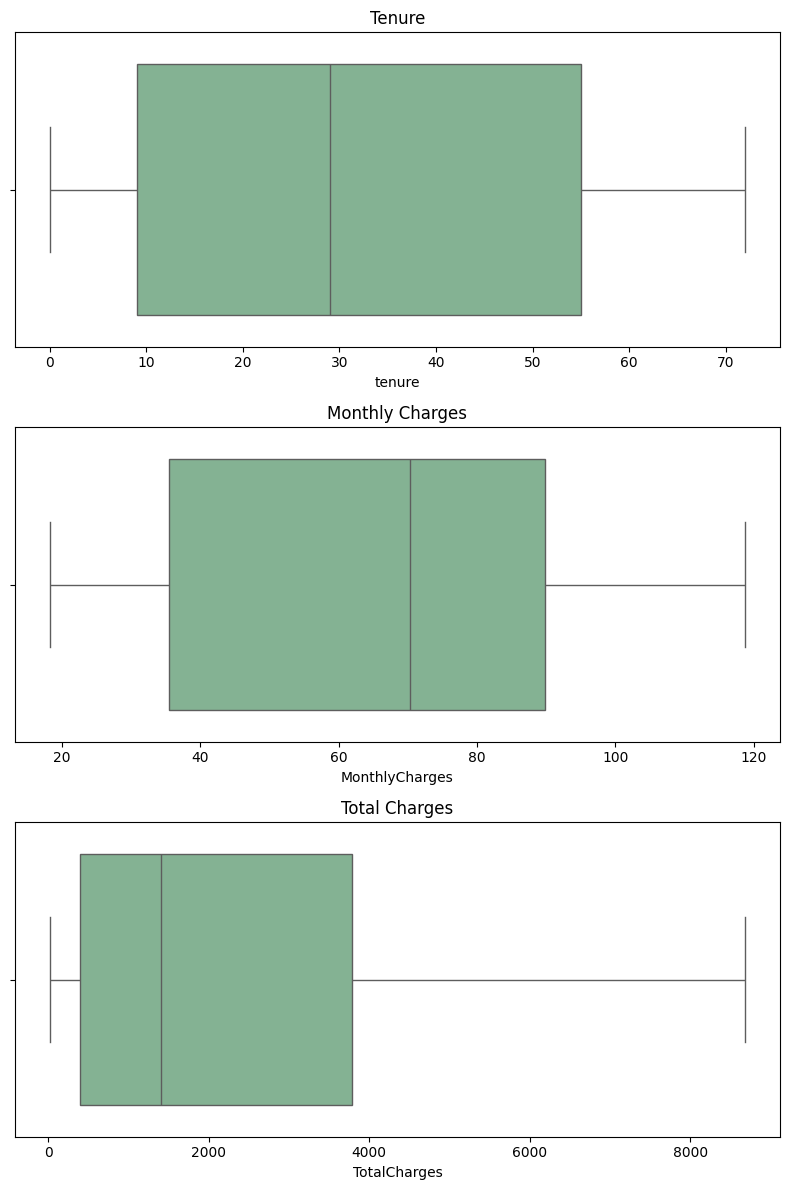

In [ ]:

# Select a single color from the "crest" palette to use consistently
single_color = sns.color_palette("crest")[0]

# Creating subplots for selected columns
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

# Plot each feature separately with a single color
sns.boxplot(data=df, x='tenure', ax=axes[0], color=single_color)
axes[0].set_title('Tenure')

sns.boxplot(data=df, x='MonthlyCharges', ax=axes[1], color=single_color)
axes[1].set_title('Monthly Charges')

sns.boxplot(data=df, x='TotalCharges', ax=axes[2], color=single_color)
axes[2].set_title('Total Charges')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### 3. EDA

### 3.1 Distribution of Numerical Features

0 SeniorCitizen
1 tenure
2 MonthlyCharges
3 TotalCharges


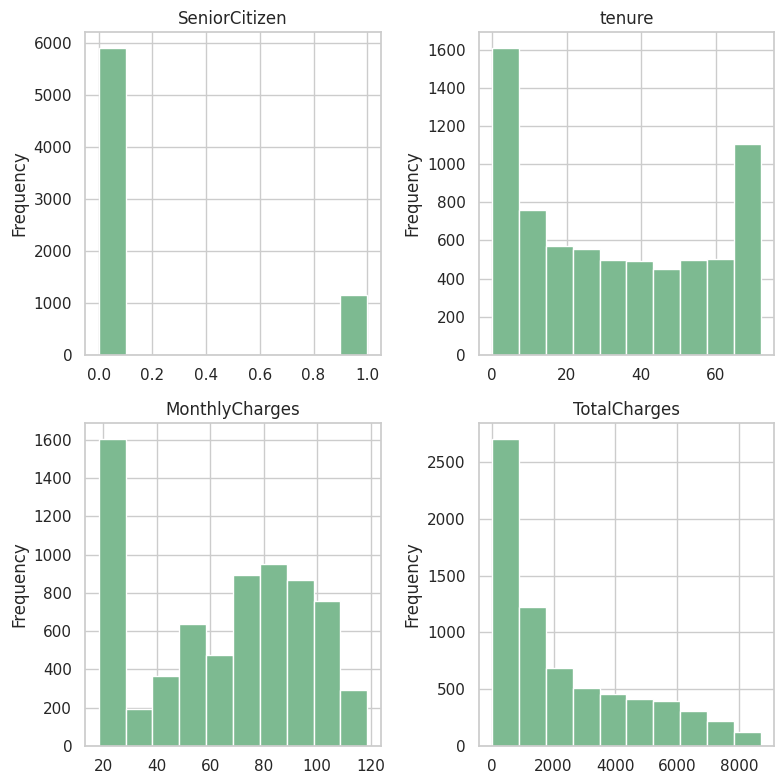

In [ ]:

# Set the seaborn theme with the "crest" palette
sns.set_theme(style="whitegrid", palette="crest")

# Select numeric columns
df_numeric = df.select_dtypes('number')

# Set up the color to use from the "crest" palette
color = sns.color_palette("crest")[0]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# Plot histograms for each numeric column with the specified color
for i, col in enumerate(df_numeric.columns):
    print(i, col)
    df[col].plot.hist(ax=axes.flat[i], color=color,)
    axes.flat[i].set_title(col)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


### 3.2 Distribution of Categorical Features


In [ ]:
# Get the count of each category
gender = df['gender'].value_counts()
Partner = df['Partner'].value_counts()
Dependents = df['Dependents'].value_counts()
PhoneService = df['PhoneService'].value_counts()
MultipleLines = df['MultipleLines'].value_counts()
InternetService = df['InternetService'].value_counts()
OnlineSecurity = df['OnlineSecurity'].value_counts()
OnlineBackup = df['OnlineBackup'].value_counts()
DeviceProtection = df['DeviceProtection'].value_counts()
TechSupport = df['TechSupport'].value_counts()
StreamingTV = df['StreamingTV'].value_counts()
StreamingMovies = df['StreamingMovies'].value_counts()
Contract = df['Contract'].value_counts()
PaperlessBilling = df['PaperlessBilling'].value_counts()
PaymentMethod = df['PaymentMethod'].value_counts()
Churn = df['Churn'].value_counts()

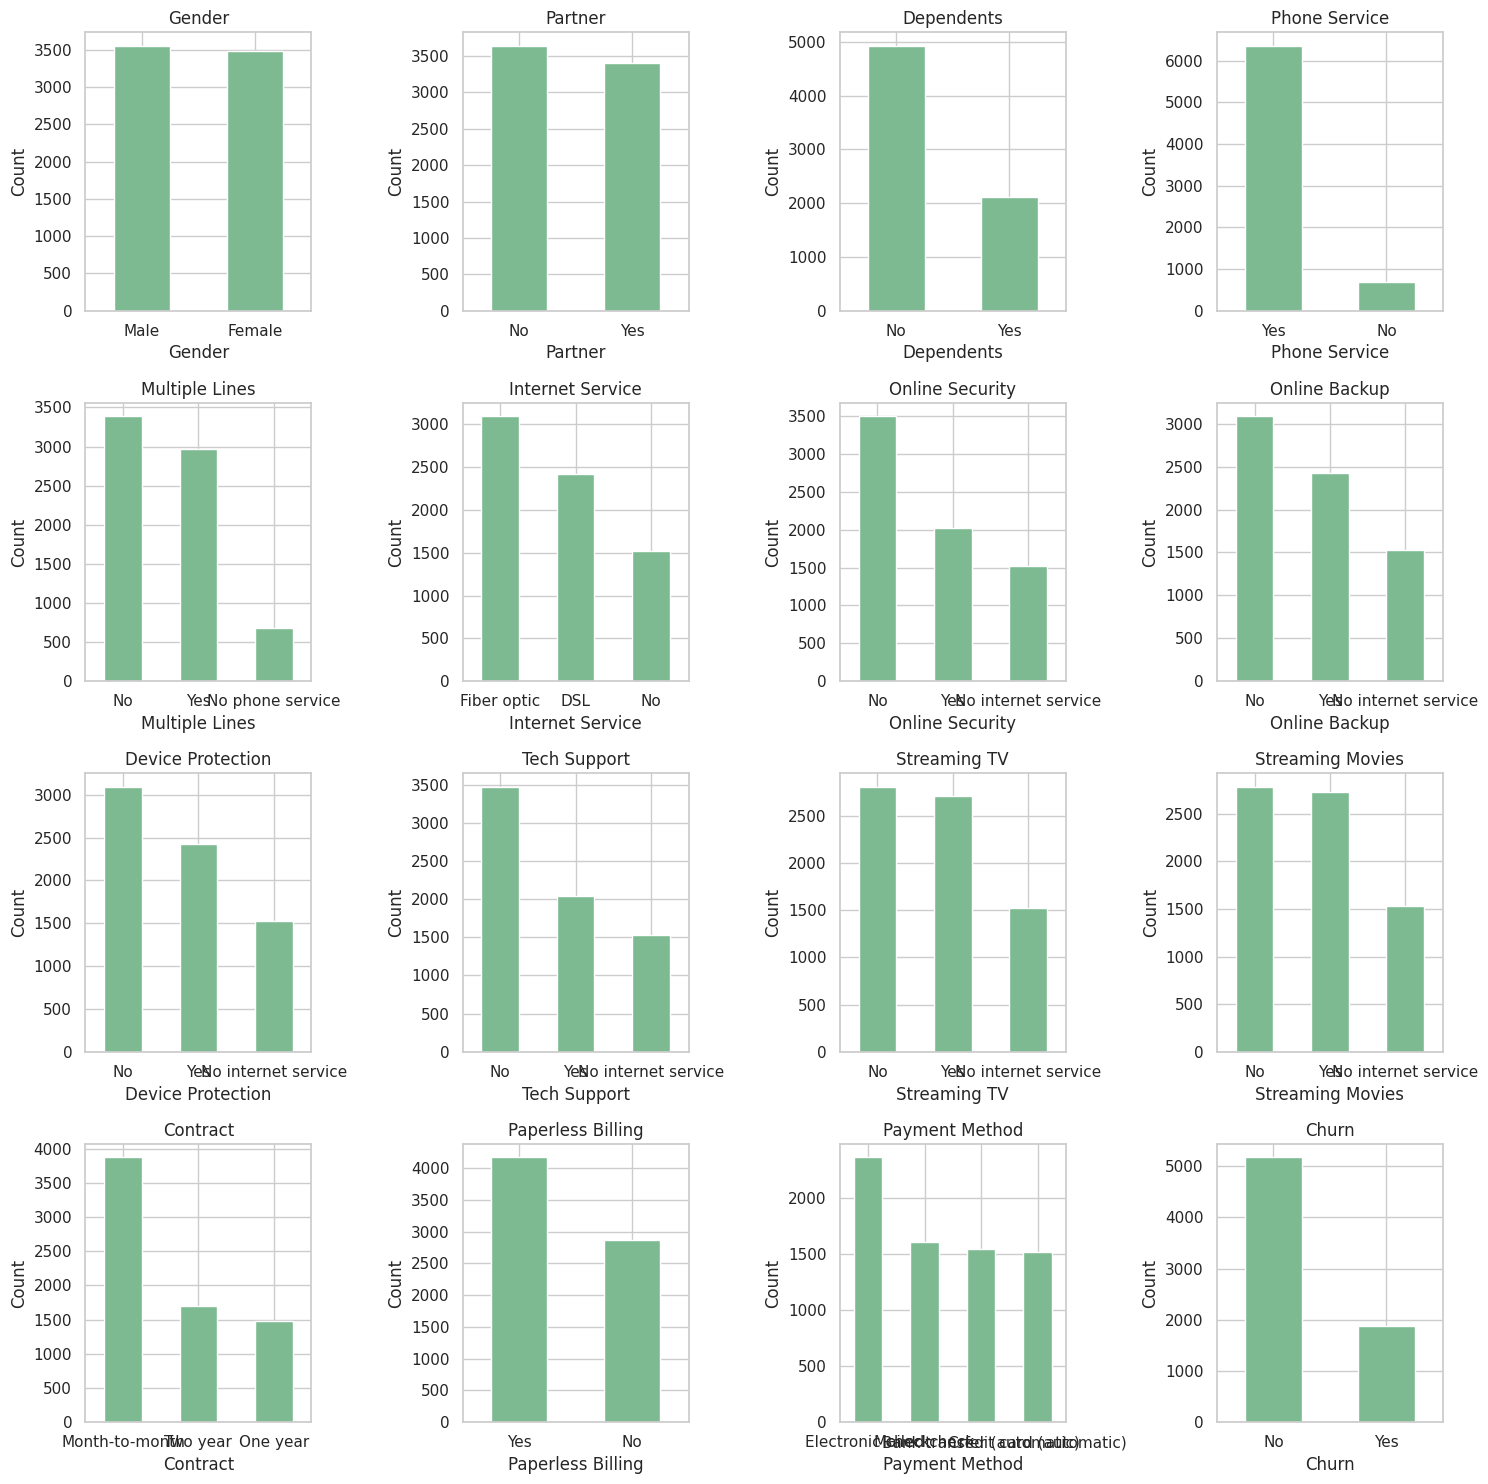

In [ ]:
# Set up the color palette
palette = sns.color_palette("crest")
color = palette[0]

# Creating subplots for selected columns
fig, axes = plt.subplots(4, 4, figsize=(15, 15))

# List of counts and titles for each subplot
value_counts = [gender, Partner, Dependents, PhoneService, MultipleLines,
                InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
                StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, Churn]

titles = ['Gender', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines',
          'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
          'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Churn']

# Plot each value count as a bar chart
for i, ax in enumerate(axes.flatten()):
    value_counts[i].plot(kind='bar', ax=ax, color=color, rot=0)
    ax.set_title(titles[i])
    ax.set_ylabel('Count')
    ax.set_xlabel(titles[i])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### 3.3 Churn Rates by Categorical Features

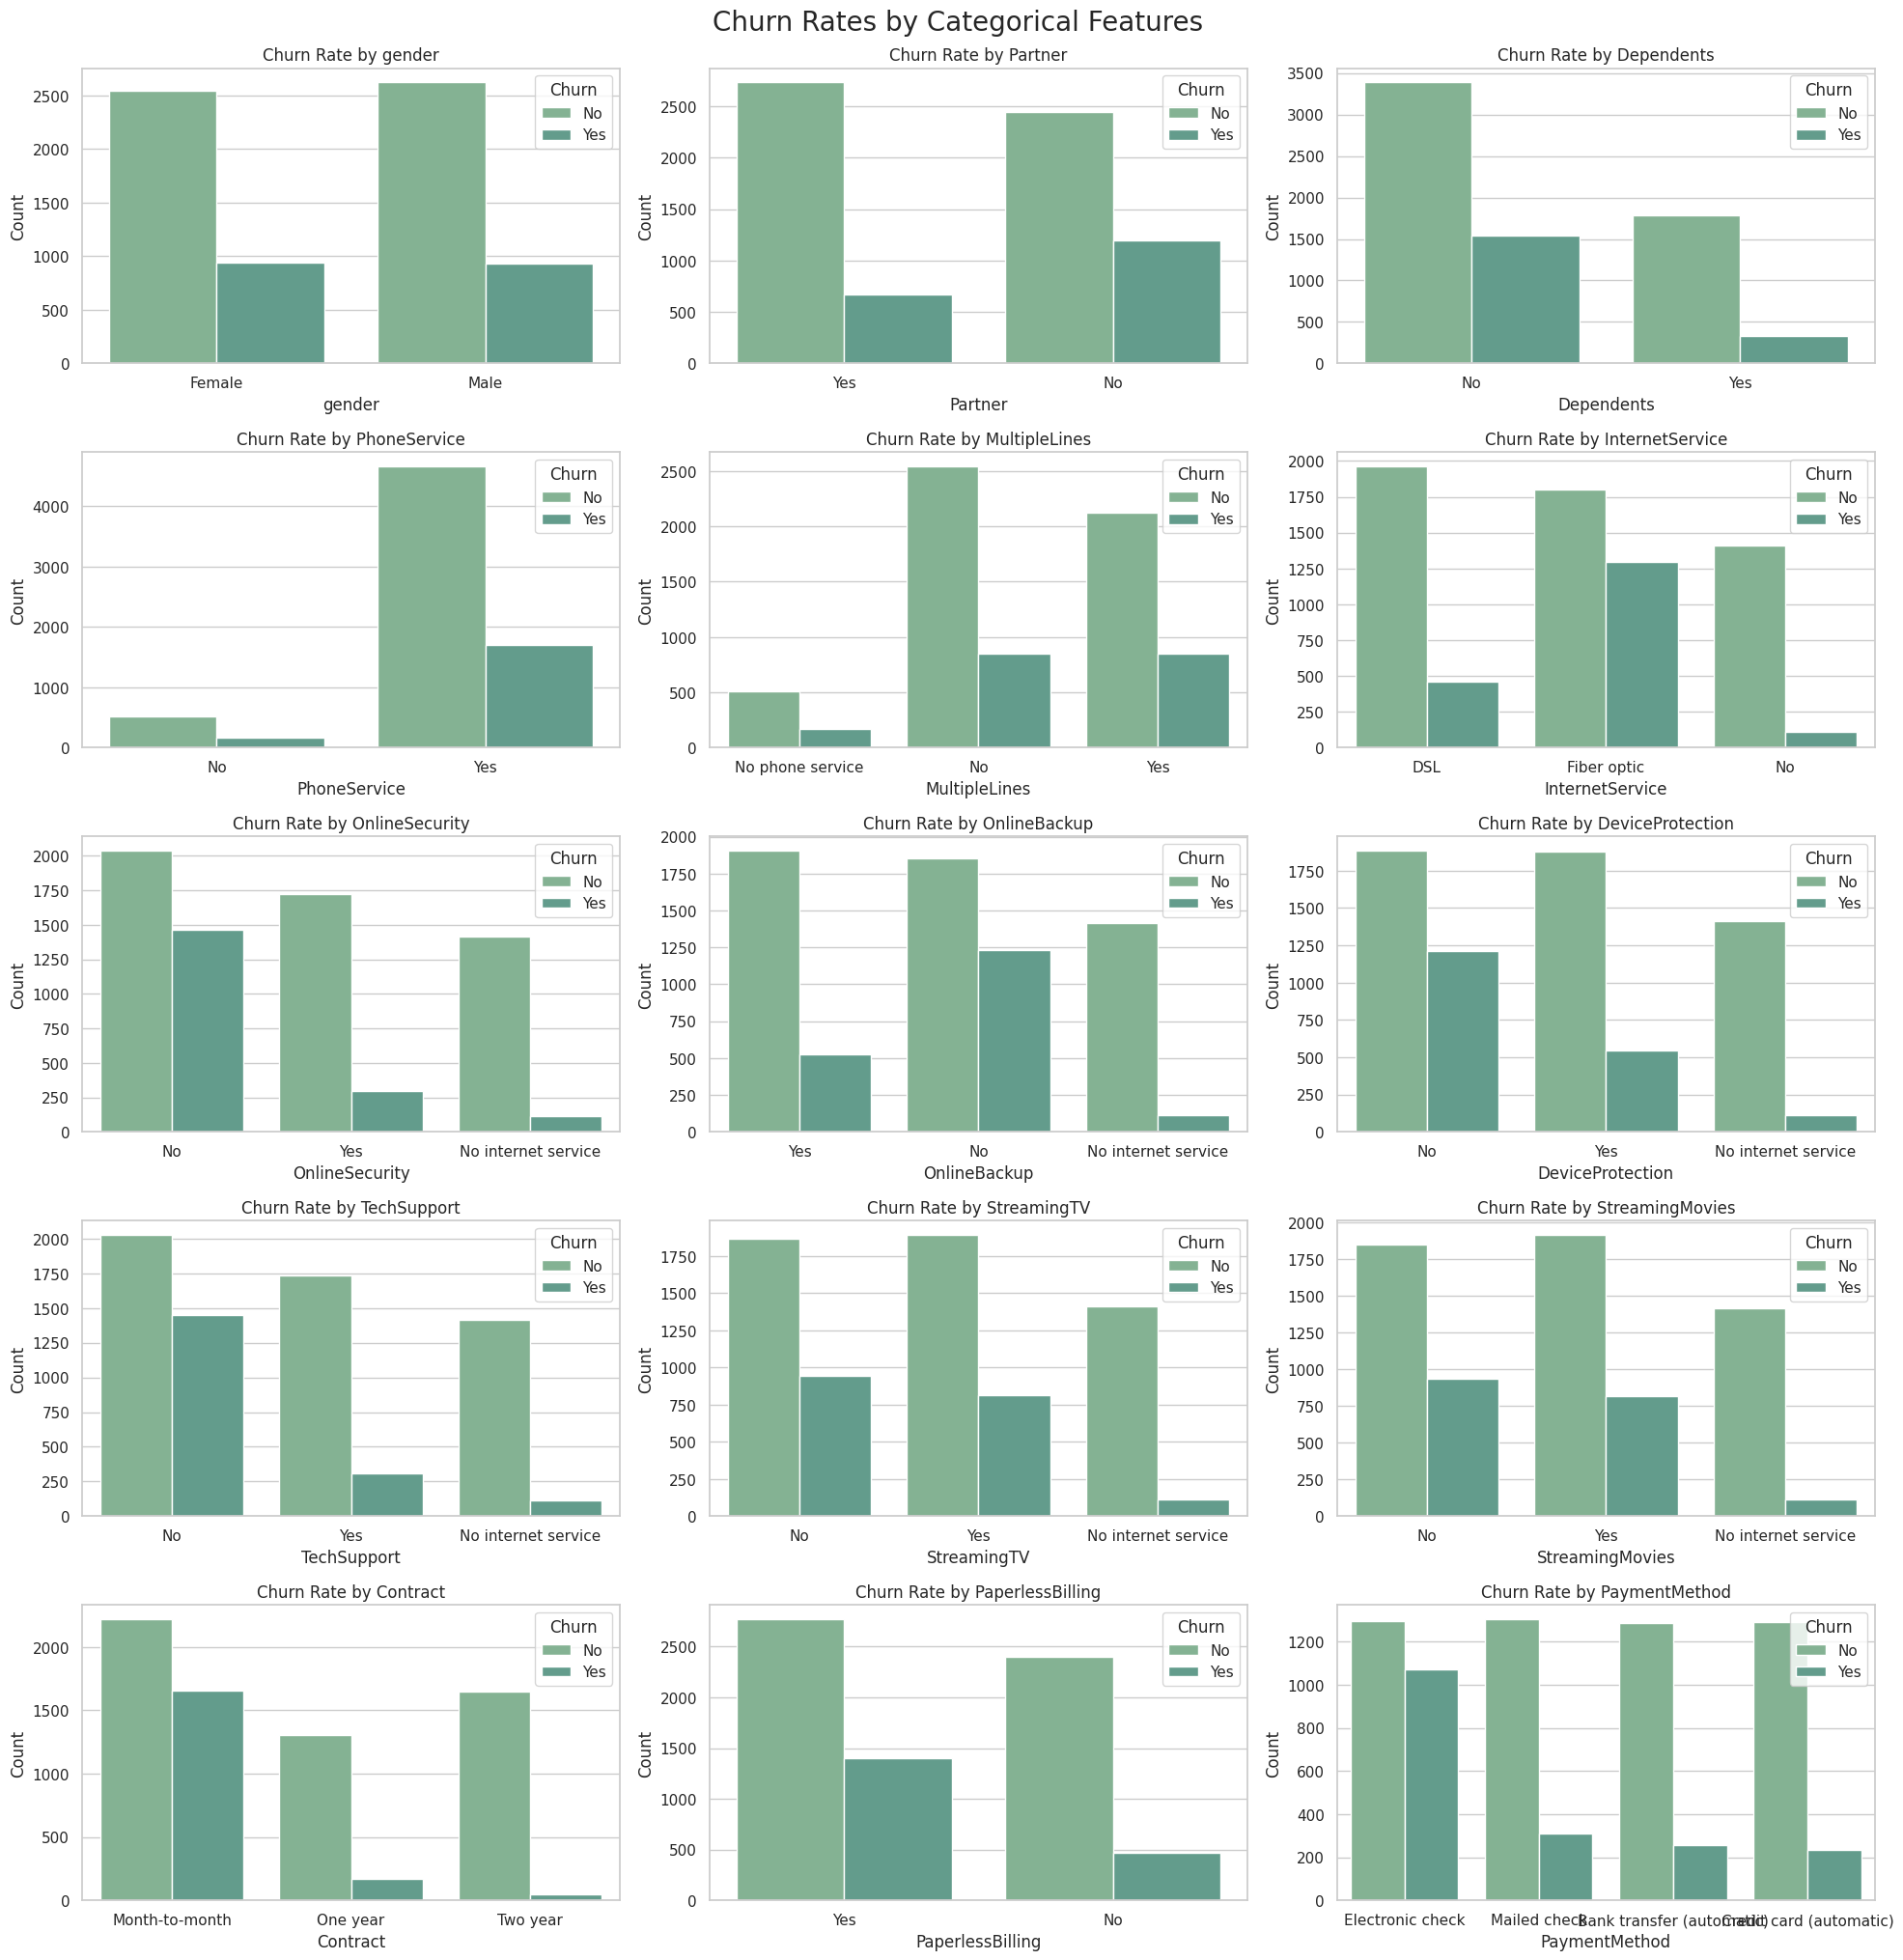

In [ ]:
# Convert TotalCharges to numeric, coercing errors to NaN for any non-numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Set the seaborn theme with the "crest" palette
sns.set_theme(style="whitegrid", palette="crest")

# Fixing the subplot indexing issue
plt.figure(figsize=(20, 25))
plt.suptitle('Churn Rates by Categorical Features', fontsize=20, y=0.95)

# Reset plot counter
plot_index = 1
# Define the number of columns for the subplot grid
num_cols = 3
num_plots = len(categorical_columns) - 1  # excluding 'Churn' itself

# Loop over categorical columns and plot churn rates
for col in categorical_columns:
    if col != 'Churn':
        plt.subplot((num_plots // num_cols) + 1, num_cols, plot_index)
        sns.countplot(x=col, hue="Churn", data=df)
        plt.title(f"Churn Rate by {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.legend(title='Churn', loc='upper right')
        plot_index += 1

# Adjust layout to avoid overlap and fit the title
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 4. Feature Engineering and Augmentation

4.1. Creating New Features


In [ ]:

# 1. Customer Tenure Categories
# Define categories based on tenure months
df['TenureCategory'] = pd.cut(df['tenure'], bins=[0, 12, 24, df['tenure'].max()], labels=['New', 'Established', 'Loyal'])

# 2. Average Monthly Charges
# Calculate the average monthly charges over tenure for each customer
df['AvgMonthlyCharges'] = df['TotalCharges'] / df['tenure']
df['AvgMonthlyCharges'].fillna(df['MonthlyCharges'], inplace=True)  # Handling potential division by zero for new customers

# 3. Contract Type with Tenure Category
# Combine Contract and TenureCategory into a new feature
df['Contract_Tenure'] = df['Contract'] + "_" + df['TenureCategory'].astype(str)

# 4. Service Engagement Score
# Create a score based on usage of multiple services
service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df['ServiceEngagementScore'] = df[service_columns].apply(lambda x: sum(x == 'Yes'), axis=1)

# 5. Billing and Payment Trends
# Identify customers on autopay (automatic payment methods)
df['AutoPay'] = df['PaymentMethod'].apply(lambda x: 1 if 'automatic' in x.lower() else 0)

# 6. Service Add-ons Count
# Count the number of add-on services each customer has
df['ServiceCount'] = df[service_columns].apply(lambda x: sum(x == 'Yes'), axis=1)

# 7. Monthly Charges to Total Charges Ratio
# Calculate the ratio of MonthlyCharges to TotalCharges
df['ChargesRatio'] = df['MonthlyCharges'] / df['TotalCharges']
df['ChargesRatio'].replace([float('inf'), -float('inf')], 0, inplace=True)  # Replace infinite values (due to division by zero) with 0
df['ChargesRatio'].fillna(0, inplace=True)  # Fill any remaining NaN values with 0

# Display the DataFrame with new features
df.head()


<ipython-input-63-d4a3df1188df>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AvgMonthlyCharges'].fillna(df['MonthlyCharges'], inplace=True)  # Handling potential division by zero for new customers
<ipython-input-63-d4a3df1188df>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,TenureCategory,AvgMonthlyCharges,Contract_Tenure,ServiceEngagementScore,AutoPay,ServiceCount,ChargesRatio
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,29.85,29.85,0,New,29.850000,Month-to-month_New,1,0,1,1.000000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,56.95,1889.50,0,Loyal,55.573529,One year_Loyal,2,0,2,0.030140
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,53.85,108.15,1,New,54.075000,Month-to-month_New,2,0,2,0.497920
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,42.30,1840.75,0,Loyal,40.905556,One year_Loyal,3,1,3,0.022980
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,70.70,151.65,1,New,75.825000,Month-to-month_New,0,0,0,0.466205


4.2. Distribution Analysis of Augmented Features

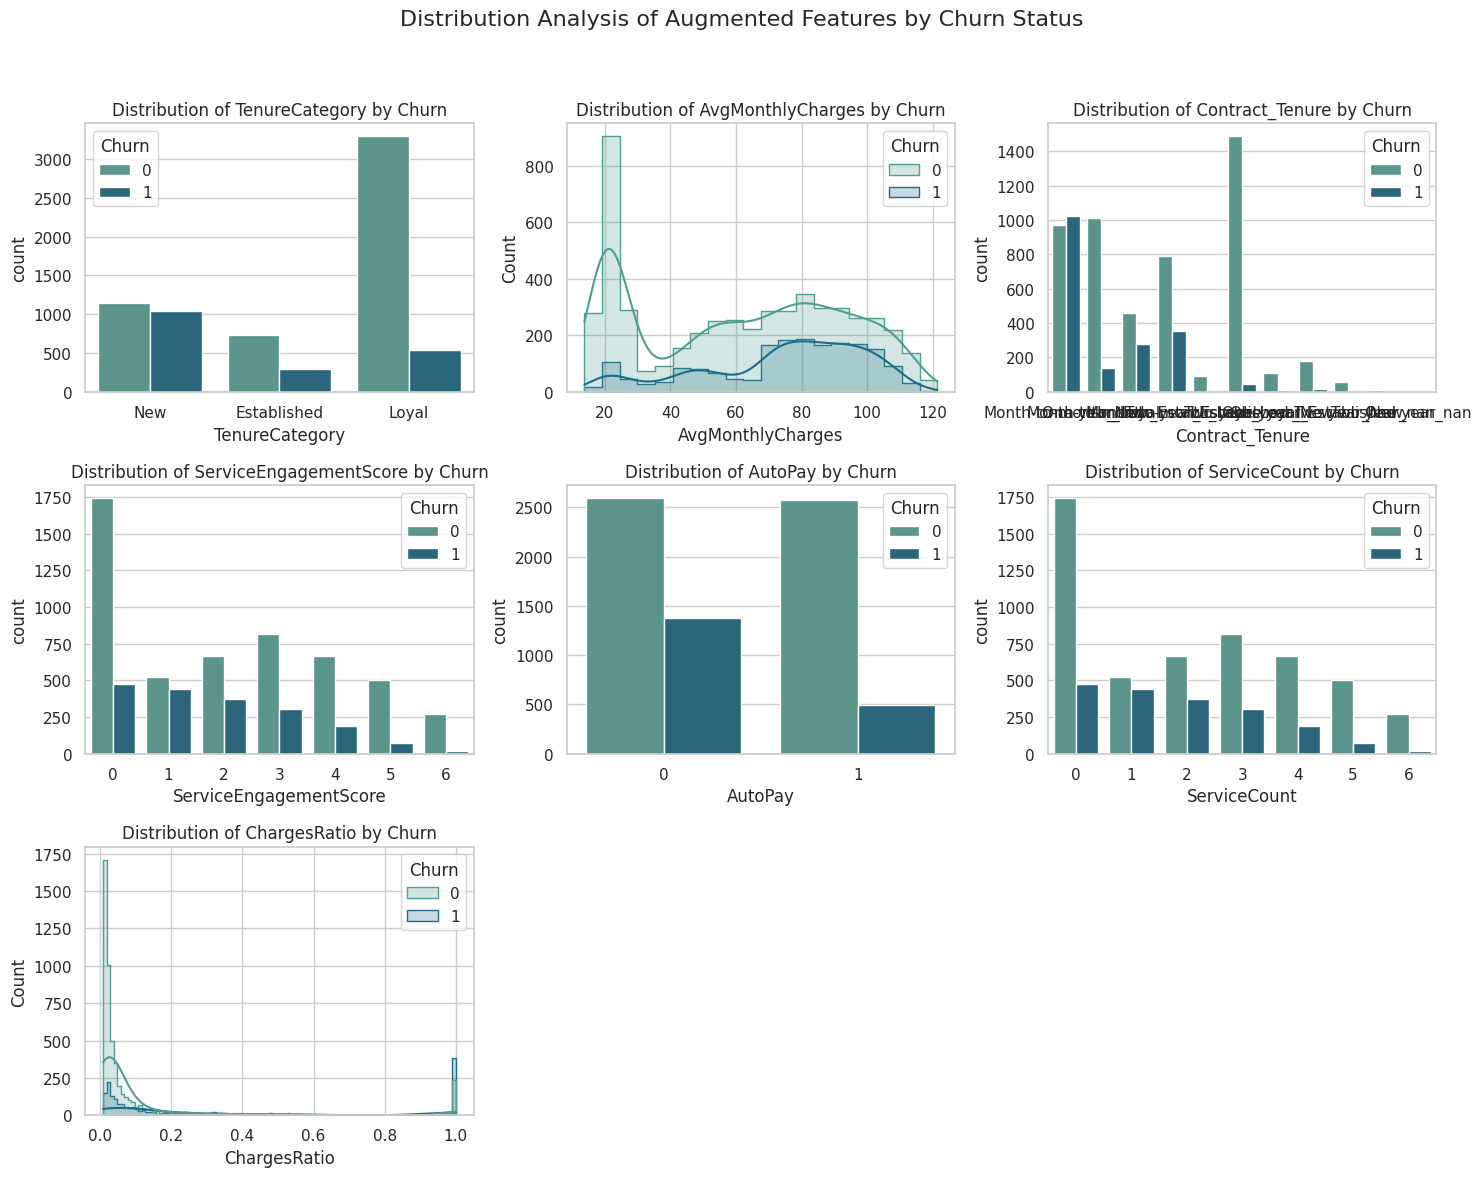

In [ ]:

# Define the augmented features to analyze
augmented_features = ['TenureCategory', 'AvgMonthlyCharges', 'Contract_Tenure',
                      'ServiceEngagementScore', 'AutoPay', 'ServiceCount', 'ChargesRatio']

# Set up the figure for multiple subplots
plt.figure(figsize=(15, 12))
plt.suptitle("Distribution Analysis of Augmented Features by Churn Status", fontsize=16)

# Loop through each feature to plot its distribution by Churn
for i, feature in enumerate(augmented_features, 1):
    plt.subplot(3, 3, i)
    if df[feature].dtype == 'object' or df[feature].nunique() < 10:
        # For categorical features, use a count plot
        sns.countplot(data=df, x=feature, hue='Churn', palette='crest')
        plt.legend(title='Churn')
    else:
        # For numerical features, use a histogram with KDE, separated by Churn
        sns.histplot(data=df, x=feature, hue='Churn', kde=True, palette='crest', element="step")
    plt.title(f"Distribution of {feature} by Churn")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# 5. Correlation

In [ ]:
# Calculate correlation matrix for numerical columns
numerical_correlation = df[numerical_columns].corr()

# Perform Chi-square test for categorical columns
from scipy.stats import chi2_contingency

chi_square_results = {}
for col in categorical_columns:
    if col != 'Churn':  # Skip the target column for now
        contingency_table = pd.crosstab(df['Churn'], df[col])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        chi_square_results[col] = {'chi2': chi2, 'p-value': p, 'dof': dof}

### 5.1 Correlation Matrix for Numerical Columns

In [ ]:
# Displaying numerical correlation matrix as a DataFrame

numerical_correlation.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102395
tenure,0.016567,1.000000,0.247900,0.824757
MonthlyCharges,0.220173,0.247900,1.000000,0.650468
TotalCharges,0.102395,0.824757,0.650468,1.000000


### 5.2 Chi_Square Test for Categorical Columns

In [ ]:
# Creating the DataFrame
chi_square_df = pd.DataFrame(chi_square_results)

# Displaying the first few rows of the chi-square results as a DataFrame
chi_square_df.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
chi2,0.484083,1.587334e+02,1.891292e+02,0.915033,11.330441,7.323096e+02,8.499990e+02,6.018128e+02,5.584194e+02,8.281971e+02,3.742039e+02,3.756615e+02,1.184597e+03,2.582776e+02,6.481423e+02
p-value,0.486579,2.139911e-36,4.924922e-43,0.338783,0.003464,9.571788e-160,2.661150e-185,2.079759e-131,5.505219e-122,1.443084e-180,5.528994e-82,2.667757e-82,5.863038e-258,4.073355e-58,3.682355e-140
dof,1.000000,1.000000e+00,1.000000e+00,1.000000,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,3.000000e+00


### 6. Churn Rate Analysis and Data Imbalance



In [ ]:

# Calculate the overall percentage of 'Yes' and 'No' in the Churn column
churn_overall = df['Churn'].value_counts(normalize=True) * 100

# Calculate the percentage of 'Yes' and 'No' in Churn within each category of the categorical features
churn_by_category = {}
for col in categorical_columns:
    if col != 'Churn':
        churn_by_category[col] = df.groupby(col)['Churn'].value_counts(normalize=True).unstack() * 100



# Prepare a DataFrame to display churn rates for each categorical feature in a structured format
churn_summary = []

# Overall churn rate
churn_summary.append(['Overall', 'No', churn_overall['No'], 'Yes', churn_overall['Yes']])

# Churn rates by category
for feature, churn_data in churn_by_category.items():
    for label, row in churn_data.iterrows():
        churn_summary.append([feature, label, row['No'], 'Yes', row['Yes']])

# Convert to DataFrame for easy reading
churn_summary_df = pd.DataFrame(churn_summary, columns=['Feature', 'Category', 'Stayed (%)', 'Churned Label', 'Churned (%)'])



In [ ]:
# Displaying the first few rows of the churn summary table again for easy reference.
churn_summary_df.head(50)

,Feature,Category,Stayed (%),Churned Label,Churned (%)
0,Overall,No,73.463013,Yes,26.536987
1,gender,Female,73.079128,Yes,26.920872
2,gender,Male,73.839662,Yes,26.160338
3,Partner,No,67.042021,Yes,32.957979
4,Partner,Yes,80.335097,Yes,19.664903
5,Dependents,No,68.720860,Yes,31.279140
6,Dependents,Yes,84.549763,Yes,15.450237
7,PhoneService,No,75.073314,Yes,24.926686
8,PhoneService,Yes,73.290363,Yes,26.709637
9,MultipleLines,No,74.955752,Yes,25.044248


### 7. Data Preparation

In [ ]:
# Encoding categorical variables and handling missing values
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())  # Filling missing values in TotalCharges

# Label encoding for the target variable 'Churn'
df['Churn'] = LabelEncoder().fit_transform(df['Churn'])

# One-hot encoding for categorical features
data_encoded = pd.get_dummies(df, columns=[
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
])

In [ ]:
data_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


## 8. Individual Model Implementations

In [ ]:
# Splitting data into features and target
X = data_encoded.drop(columns=['Churn'])
y = data_encoded['Churn']

# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 8.1 Neural Network Model (NN) Implementation

In [ ]:

# Building the Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
test_accuracy


Epoch 1/50
141/141 [==============================] - 1s 3ms/step - loss: 0.5503 - accuracy: 0.7211 - val_loss: 0.4291 - val_accuracy: 0.7915
Epoch 2/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7697 - val_loss: 0.4213 - val_accuracy: 0.7924
Epoch 3/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.7834 - val_loss: 0.4188 - val_accuracy: 0.7924
Epoch 4/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4442 - accuracy: 0.7925 - val_loss: 0.4140 - val_accuracy: 0.7986
Epoch 5/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.7908 - val_loss: 0.4134 - val_accuracy: 0.7986
Epoch 6/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.7961 - val_loss: 0.4123 - val_accuracy: 0.8004
Epoch 7/50
141/141 [==============================] - 0s 2ms/step - loss: 0.4364 - accuracy: 0.7919 - val_loss: 0.4127 - val_accuracy: 0.8048
Epoch 

0.8083747625350952

### 8.2 XGBoost Model Implementation

In [ ]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy and other evaluation metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_classification_report = classification_report(y_test, y_pred_xgb)
xgb_confusion_matrix = confusion_matrix(y_test, y_pred_xgb)



print("Accuracy:", xgb_accuracy)
print("xgb_classification_report:\n",xgb_classification_report)
print("xgb_confusion_matrix:",xgb_confusion_matrix)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:37:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7984386089425124
xgb_classification_report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.64      0.55      0.59       373

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409

xgb_confusion_matrix: [[919 117]
 [167 206]]


8.3 Random Forest Model Implementation

In [ ]:
# Initialize the RandomForest model
rf_model = RandomForestClassifier(random_state=42)

# Train the RandomForest model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy and other evaluation metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification_report = classification_report(y_test, y_pred_rf)
rf_confusion_matrix = confusion_matrix(y_test, y_pred_rf)

print("Accuracy:", rf_accuracy)
print("RandomForest_classification_report:\n",rf_classification_report)
print("RandomForest_confusion_matrix:",rf_confusion_matrix)


Accuracy: 0.7934705464868701
RandomForest_classification_report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.66      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

RandomForest_confusion_matrix: [[946  90]
 [201 172]]


#### 8.4. Plot of Model Accuracy Comparison

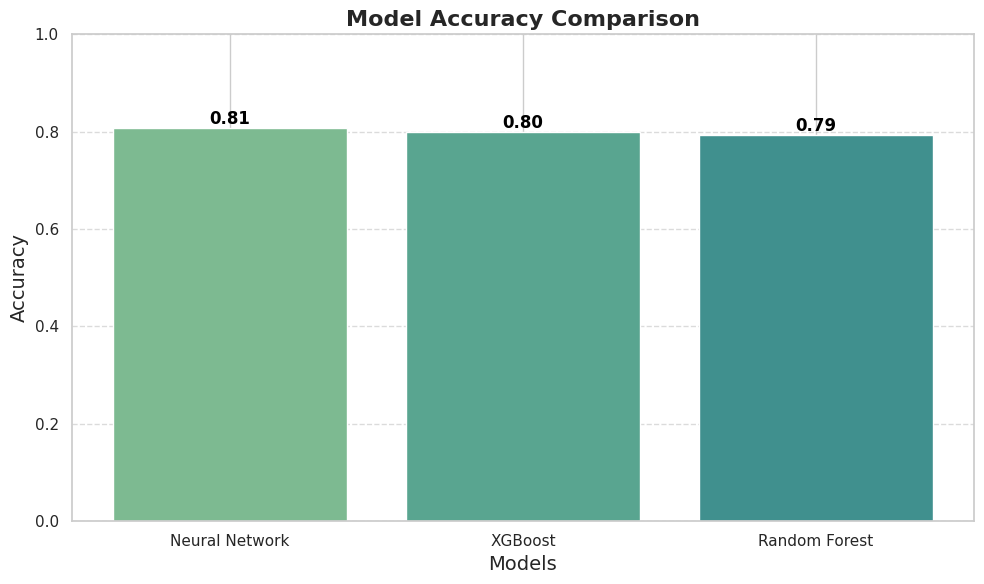

In [ ]:
# Model accuracies
model_accuracies = {
    'Neural Network': test_accuracy,
    'XGBoost': xgb_accuracy,
    'Random Forest': rf_accuracy
}

# Create a bar plot
plt.figure(figsize=(10, 6))  # Increased figure size for better readability
bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), color=sns.color_palette("crest"))

# Add value annotations on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}",
             ha='center', va='bottom', fontsize=12, color='Black', fontweight='bold')

# Customize labels and title
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Model Accuracy Comparison", fontsize=16, fontweight='bold')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Ensure everything fits well
plt.show()


## 9. Handling Class Imbalance Using SMOTE

In [ ]:
# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Splitting the resampled data into training and testing sets
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

9.1 Neural Network Model (NN) Implementation whith SMOTE

In [ ]:
# Redefine the neural network model
nn_model_balanced = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
nn_model_balanced.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the balanced dataset
history_balanced = nn_model_balanced.fit(X_train_balanced, y_train_balanced, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the balanced test set
test_loss_balanced, test_accuracy_balanced = nn_model_balanced.evaluate(X_test_balanced, y_test_balanced, verbose=0)
test_accuracy_balanced


Epoch 1/50
207/207 [==============================] - 2s 3ms/step - loss: 0.5583 - accuracy: 0.7199 - val_loss: 0.4748 - val_accuracy: 0.7748
Epoch 2/50
207/207 [==============================] - 1s 3ms/step - loss: 0.4953 - accuracy: 0.7594 - val_loss: 0.4564 - val_accuracy: 0.7796
Epoch 3/50
207/207 [==============================] - 1s 3ms/step - loss: 0.4852 - accuracy: 0.7789 - val_loss: 0.4510 - val_accuracy: 0.7868
Epoch 4/50
207/207 [==============================] - 1s 3ms/step - loss: 0.4777 - accuracy: 0.7791 - val_loss: 0.4479 - val_accuracy: 0.7899
Epoch 5/50
207/207 [==============================] - 1s 3ms/step - loss: 0.4741 - accuracy: 0.7771 - val_loss: 0.4500 - val_accuracy: 0.7929
Epoch 6/50
207/207 [==============================] - 1s 3ms/step - loss: 0.4701 - accuracy: 0.7776 - val_loss: 0.4436 - val_accuracy: 0.7850
Epoch 7/50
207/207 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7777 - val_loss: 0.4399 - val_accuracy: 0.7983
Epoch 

0.8086956739425659

#### 9.2 XGBoost Model Implementation with SMOTE

In [ ]:
# Define and Train the XGBoost Model on the Balanced Dataset
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_balanced, y_train_balanced)

#  Evaluate the Model on the Balanced Test Set
y_pred_balanced = xgb_model.predict(X_test_balanced)

# Calculate and Print Evaluation Metrics
xgp_accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test_balanced, y_pred_balanced)
classification_rep_balanced = classification_report(y_test_balanced, y_pred_balanced)


# Model Evaluation
print("Accuracy (Balanced Data):", xgp_accuracy_balanced)
print("ROC AUC Score (Balanced Data):", roc_auc_balanced)
print("Classification Report (Balanced Data):\n", classification_rep_balanced)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:57:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy (Balanced Data): 0.8483091787439614
ROC AUC Score (Balanced Data): 0.8481376321276082
Classification Report (Balanced Data):
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1021
           1       0.84      0.86      0.85      1049

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



### 9.3 Random Forest Model Implementation wtih SMOTE

In [ ]:
# Define and Train the Random Forest Model on the Balanced Dataset
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

# Evaluate the Model on the Balanced Test Set
y_pred_balanced = rf_model.predict(X_test_balanced)

# Calculate and Print Evaluation Metrics
rf_accuracy_balanced = accuracy_score(y_test_balanced, y_pred_balanced)
roc_auc_balanced = roc_auc_score(y_test_balanced, y_pred_balanced)
classification_rep_balanced = classification_report(y_test_balanced, y_pred_balanced)

# Model Evaluation
print("Accuracy (Balanced Data):", rf_accuracy_balanced )
print("ROC AUC Score (Balanced Data):", roc_auc_balanced)
print("Classification Report (Balanced Data):\n", classification_rep_balanced)

Accuracy (Balanced Data): 0.8647342995169082
ROC AUC Score (Balanced Data): 0.8647095456799022
Classification Report (Balanced Data):
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1021
           1       0.87      0.87      0.87      1049

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



#### 9.4. Model Accuracy Comparison After SMOTE

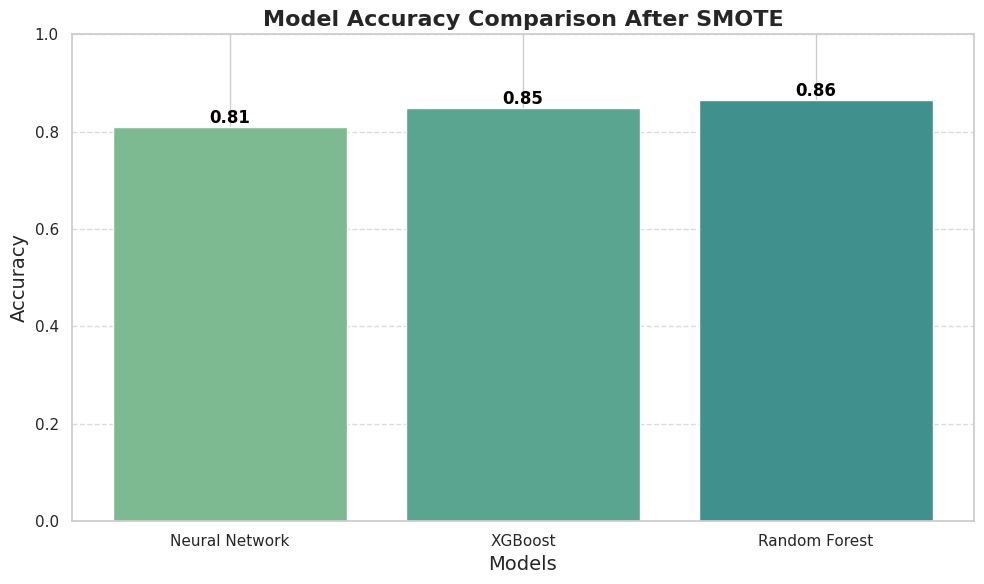

In [ ]:
# Model accuracies
model_accuracies = {
    'Neural Network': test_accuracy_balanced,
    'XGBoost': xgp_accuracy_balanced,
    'Random Forest': rf_accuracy_balanced
}

# Create a bar plot
plt.figure(figsize=(10, 6))  # Increased figure size for better readability
bars = plt.bar(model_accuracies.keys(), model_accuracies.values(), color=sns.color_palette("crest"))

# Add value annotations on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}",
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Customize labels and title
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Model Accuracy Comparison After SMOTE", fontsize=16, fontweight='bold')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Ensure everything fits well
plt.show()

10. Stacking to Enhance Model Performance

 ### 10.1  Stacking Model without Deep Learning

In [ ]:
# XGBoost Classifier
# Initialize XGBoost classifier with specific parameters
# use_label_encoder=False: Disables the use of the label encoder (avoids a warning)
# eval_metric='logloss': Logarithmic loss is used as the evaluation metric
# random_state=42: Ensures reproducibility
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)


In [ ]:
# LightGBM Classifier
# Initialize LightGBM classifier with a set random state for reproducibility
# random_state=42: Ensures reproducibility
lgb_model = lgb.LGBMClassifier(random_state=42)


In [ ]:
# Define the LSTM Model for binary classification
lstm_model = Sequential([
    # Reshape input to be compatible with LSTM layers (samples, time steps, features)
    Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),

    # First LSTM layer with 64 units and ReLU activation
    # return_sequences=True allows the next LSTM layer to receive sequences as input
    LSTM(64, activation='relu', return_sequences=True),

    # Dropout layer with a 30% dropout rate to reduce overfitting
    Dropout(0.3),

    # Second LSTM layer with 32 units and ReLU activation
    # This is the last LSTM layer, so return_sequences=False (default) to output a single vector
    LSTM(32, activation='relu'),

    # Dropout layer with a 30% dropout rate to further prevent overfitting
    Dropout(0.3),

    # Dense output layer with 1 unit and sigmoid activation for binary classification
    # Sigmoid activation outputs a probability between 0 and 1
    Dense(1, activation='sigmoid')
])

# Compile the model
# optimizer='adam': Adaptive optimizer that adjusts learning rate automatically
# loss='binary_crossentropy': Loss function for binary classification
# metrics=['accuracy']: Tracks accuracy as a metric during training
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Define the Multi-Layer Perceptron (MLP) Model for binary classification
mlp_model = Sequential([
    # First Dense layer with 64 units and ReLU activation
    # input_shape is set to the number of features in X_train
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),

    # Dropout layer with a 30% dropout rate to prevent overfitting
    Dropout(0.3),

    # Second Dense layer with 32 units and ReLU activation
    Dense(32, activation='relu'),

    # Another Dropout layer with a 30% dropout rate
    Dropout(0.3),

    # Output layer with 1 unit and sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the MLP model
# optimizer='adam': Adaptive optimizer that adjusts the learning rate automatically
# loss='binary_crossentropy': Loss function for binary classification
# metrics=['accuracy']: Tracks accuracy as a metric during training
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Support Vector Machine (SVM) Model for classification
# probability=True: Enables probability estimates, allowing for soft predictions
# random_state=42: Ensures reproducibility
svm_model = SVC(probability=True, random_state=42)


In [ ]:
# Define base models for stacking
base_estimators = [
    ('xgb', xgb_model),
    ('lgb', lgb_model),
    ('svm', svm_model)
]

# Define the meta-classifier
meta_classifier = LogisticRegression()

#  Stacking Model
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_classifier)
stacking_model.fit(X_train, y_train)

In [ ]:
# Save the model
with open('stacking_model.pkl', 'wb') as file:
    pickle.dump(stacking_model, file)


In [ ]:
# Load the model
with open('stacking_model.pkl', 'rb') as file:
    stacking_model = pickle.load(file)

In [ ]:
# Predict
y_pred = stacking_model.predict(X_test)

# Accuracy
accuracy_without_dl= accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Model Evaluation
print("Accuracy:",  accuracy_without_dl)
print("ROC AUC Score:", roc_auc)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.7799858055358411
ROC AUC Score: 0.7182761083565373
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.59      0.59       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



### 10.2  Stacking Model with Deep Learning

In [ ]:
# Wrapping the MLP model using KerasClassifier
mlp_model = KerasClassifier(build_fn=lambda: Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons and ReLU activation
    Dropout(0.3),  # Dropout layer to prevent overfitting
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    Dropout(0.3),  # Another dropout layer to prevent overfitting
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
]), epochs=50, batch_size=32, verbose=0)


<ipython-input-43-8b14bb78fdf1>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  mlp_model = KerasClassifier(build_fn=lambda: Sequential([


In [ ]:

# Wrapping the LSTM model using KerasClassifier
lstm_model = KerasClassifier(build_fn=lambda: Sequential([
    Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),  # Reshape input to be compatible with LSTM
    LSTM(64, activation='relu', return_sequences=True),  # LSTM layer with 64 units and ReLU activation
    Dropout(0.3),  # Dropout layer to prevent overfitting
    LSTM(32, activation='relu'),  # Second LSTM layer with 32 units and ReLU activation
    Dropout(0.3),  # Dropout layer to further reduce overfitting
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
]), epochs=50, batch_size=32, verbose=0)


<ipython-input-44-2d20c05625cb>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasClassifier(build_fn=lambda: Sequential([


In [ ]:
# Initialize the base models without fitting
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgb_model = lgb.LGBMClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)


In [ ]:
# Define model creation function
def create_lstm_model():
    model = Sequential([
        Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
        LSTM(64, activation='relu', return_sequences=True),
        Dropout(0.3),
        LSTM(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=50, batch_size=32, verbose=0)

<ipython-input-46-dd4713220d72>:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  lstm_model = KerasClassifier(build_fn=create_lstm_model, epochs=50, batch_size=32, verbose=0)


In [ ]:
# Define the function to create an MLP model
def create_mlp_model():
    # Initialize a Sequential model
    model = Sequential([
        # First dense layer with 64 units, ReLU activation
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),

        # Dropout layer with 30% rate to prevent overfitting
        Dropout(0.3),

        # Second dense layer with 32 units, ReLU activation
        Dense(32, activation='relu'),

        # Another Dropout layer with 30% rate
        Dropout(0.3),

        # Output layer with sigmoid activation for binary classification
        Dense(1, activation='sigmoid')
    ])

    # Compile the model with Adam optimizer and binary crossentropy loss for classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier to make it compatible with scikit-learn
mlp_model = KerasClassifier(build_fn=create_mlp_model, epochs=50, batch_size=32, verbose=0)


<ipython-input-47-e7ec69aea864>:26: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  mlp_model = KerasClassifier(build_fn=create_mlp_model, epochs=50, batch_size=32, verbose=0)


In [ ]:
# Define base models for stacking
base_estimators = [
    ('xgb', xgb_model),
    ('lgb', lgb_model),
    ('svm', svm_model),
    ('mlp', mlp_model),
    ('lstm', lstm_model)
]

#Define the meta-classifier
meta_classifier = LogisticRegression()


#  Stacking Model
stacking_model = StackingClassifier(estimators=base_estimators, final_estimator=meta_classifier)
stacking_model.fit(X_train, y_train)


In [ ]:
# Save the model
with open('stacking_model-2.pkl', 'wb') as file:
    pickle.dump(stacking_model, file)


In [ ]:
# Load the model
with open('stacking_model-2.pkl', 'rb') as file:
    stacking_model2 = pickle.load(file)

In [ ]:
# Predict
y_pred = stacking_model2.predict(X_test)

# Accuracy
accuracy_with_dl = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)


# Model Evaluation
print("Accuracy:", accuracy_with_dl)
print("ROC AUC Score:", roc_auc)
print(classification_report(y_test, y_pred))


45/45 [==============================] - 1s 20ms/step
Accuracy: 0.8665720369056068
ROC AUC Score: 0.8397799848872235
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1036
           1       0.73      0.78      0.76       373

    accuracy                           0.87      1409
   macro avg       0.83      0.84      0.83      1409
weighted avg       0.87      0.87      0.87      1409



#### 10.3 Plot of Accuracy Comparison of Stacking Models

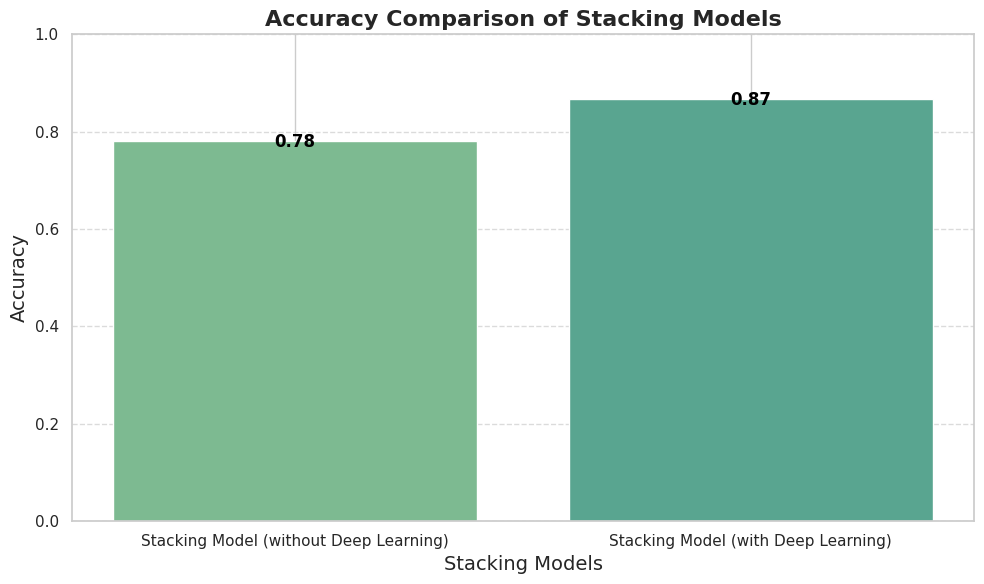

In [ ]:
# Assuming you have the accuracies of the stacking models stored in a dictionary
stacking_model_accuracies = {
    'Stacking Model (without Deep Learning)': accuracy_without_dl,  # Replace with actual accuracy
    'Stacking Model (with Deep Learning)': accuracy_with_dl  # Replace with actual accuracy
}

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjusted figure size for clarity
bars = plt.bar(stacking_model_accuracies.keys(), stacking_model_accuracies.values(), color=sns.color_palette("crest"))

# Add value annotations on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 0.02, f"{height:.2f}",
             ha='center', va='bottom', fontsize=12, color='Black', fontweight='bold')

# Add labels and title
plt.xlabel("Stacking Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy Comparison of Stacking Models", fontsize=16, fontweight='bold')

# Set y-axis limits to emphasize accuracy range
plt.ylim(0, 1)

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


## 11. Feature Importances

#### 11.1. Extract Feature Importances

In [ ]:
# Extract Feature Importances
def extract_feature_importance(stacking_model):
    """Extracts feature importances from a stacking model."""
    feature_importances = []

    # Check if the stacking model has individual base learners or an iterable structure
    base_learners = getattr(stacking_model, 'estimators_', None)

    if isinstance(base_learners, list):  # If it's a list of models
        for base_model in base_learners:
            print(f"Extracting feature importance for base model: {type(base_model).__name__}")
            if hasattr(base_model, "feature_importances_"):  # Tree-based models
                print(f"Feature importances: {base_model.feature_importances_}")
                feature_importances.append(base_model.feature_importances_)
            elif hasattr(base_model, "coef_"):  # Linear models
                print(f"Coefficients: {base_model.coef_}")
                feature_importances.append(base_model.coef_)
            else:
                print(f"Model {type(base_model).__name__} does not provide direct feature importances.")
    elif hasattr(stacking_model, "feature_importances_"):  # If it's a single model
        print(f"Extracting feature importance for stacking model: {type(stacking_model).__name__}")
        feature_importances.append(stacking_model.feature_importances_)
    else:
        print("The stacking model or its components do not provide feature importances directly.")
        return None

    # Aggregate feature importances if available
    if feature_importances:
        combined_importance = np.mean(feature_importances, axis=0)
        print("Combined Feature Importance:")
        print(combined_importance)
        return combined_importance
    else:
        print("No feature importances found.")
        return None

combined_importance = extract_feature_importance(stacking_model)


Extracting feature importance for base model: XGBClassifier
Feature importances: [0.00375136 0.00877895 0.00478151 0.00529043 0.0104333  0.0092768
 0.01637296 0.00710331 0.0094834  0.02026764 0.00964548 0.01307442
 0.01844152 0.         0.01379638 0.00830044 0.05142069 0.02691977
 0.05694122 0.         0.03297369 0.02044736 0.         0.03559585
 0.00607743 0.         0.00487831 0.04355812 0.         0.03011253
 0.00984796 0.         0.01258098 0.00744408 0.         0.00945882
 0.36984962 0.02006103 0.01154491 0.01505418 0.01595668 0.01116363
 0.01114793 0.02781443 0.01035295]
Extracting feature importance for base model: LGBMClassifier
Feature importances: [ 24 399 614 625  71  61  37  46  37  28  27  12  43   0  47  12  47   4
  46   0  30  52   0  33  18   0  23  37   0  31  24   0  29  25   0  36
  47  75  27  43  57  62  42  77  52]
Extracting feature importance for base model: SVC
Model SVC does not provide direct feature importances.
Combined Feature Importance:
[ 12.00187568 19

#### 11.2. Retrieve Feature Names

In [ ]:
# Retrieve Feature Names
def get_feature_names(model, X=None):
    """
    Extract feature names from a model or input data.

    Parameters:
    - model: The stacking model or base model.
    - X: Optional. The input data used for predictions, required if feature names aren't embedded in the model.

    Returns:
    - A list of feature names or None if not found.
    """
    # If the model has a feature_names_in_ attribute (e.g., Scikit-learn models)
    if hasattr(model, "feature_names_in_"):
        return model.feature_names_in_

    # If the model is XGBoost or similar, infer from the booster
    if hasattr(model, "get_booster"):
        return model.get_booster().feature_names

    # If the input data is available, infer feature names
    if X is not None:
        if hasattr(X, "columns"):  # Pandas DataFrame
            return X.columns.tolist()
        else:
            return [f"feature_{i}" for i in range(X.shape[1])]  # Generic names

    print("Feature names could not be inferred. Pass input data (X) if possible.")
    return None

# Provide your input data (X_sample) if available
X_sample = None  # Replace with actual dataset if available
feature_names = get_feature_names(stacking_model, X_sample)
# Order Feature Importances
def order_feature_importances(feature_importances, feature_names=None):
    """
    Order feature importances from highest to lowest.

    Parameters:
    - feature_importances: Array of feature importances.
    - feature_names: List of feature names.

    Returns:
    - Ordered list of tuples: (feature_name, importance).
    """
    if feature_names is None:
        feature_names = [f"feature_{i}" for i in range(len(feature_importances))]

    # Pair features with their importances and sort
    feature_importance_pairs = sorted(
        zip(feature_names, feature_importances),
        key=lambda x: x[1],
        reverse=True
    )
    return feature_importance_pairs


### 11.3. Plot Feature Importances

In [ ]:
# Plot Feature Importances
def plot_feature_importance(feature_importances, feature_names=None):
    """
    Plot feature importances with feature names.

    Parameters:
    - feature_importances: Array of feature importances.
    - feature_names: List of feature names.
    """
    if feature_names is None:
        feature_names = [f"feature_{i}" for i in range(len(feature_importances))]

    feature_names = [name.replace(" ", "\n") for name in feature_names]

    plt.figure(figsize=(12, len(feature_names) * 0.4))  # Adjust figure height for better spacing
    plt.barh(feature_names, feature_importances, align="center")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.title("Feature Importances")
    plt.gca().invert_yaxis()  # To have the most important feature on top
    plt.tight_layout()  # Automatically adjust layout to prevent overlap
    plt.show()


Plotting with feature names.
Ordered Feature Importances:
TotalCharges: 312.5026452129241
MonthlyCharges: 307.0023907534778
tenure: 199.50438947603106
PaymentMethod_Electronic check: 38.51390721369535
Contract_One year: 37.51003051362932
gender_Female: 35.50521664787084
PaymentMethod_Bank transfer (automatic): 31.005581815727055
gender_Male: 30.504638401791453
PaperlessBilling_Yes: 28.507978338748217
OnlineBackup_No: 26.01022367924452
PaymentMethod_Mailed check: 26.005176472943276
Contract_Month-to-month: 23.6849248111248
InternetService_Fiber optic: 23.52571034617722
MultipleLines_Yes: 23.50689818803221
OnlineSecurity_No: 23.02847060933709
Partner_Yes: 23.003551655448973
MultipleLines_No: 21.509220759384334
PaperlessBilling_No: 21.50752708921209
PaymentMethod_Credit card (automatic): 21.005573963280767
TechSupport_No: 18.52177906036377
Partner_No: 18.50818648096174
Dependents_No: 18.5047417008318
StreamingMovies_Yes: 18.004729411564767
OnlineBackup_Yes: 16.517797922715545
TechSupport_

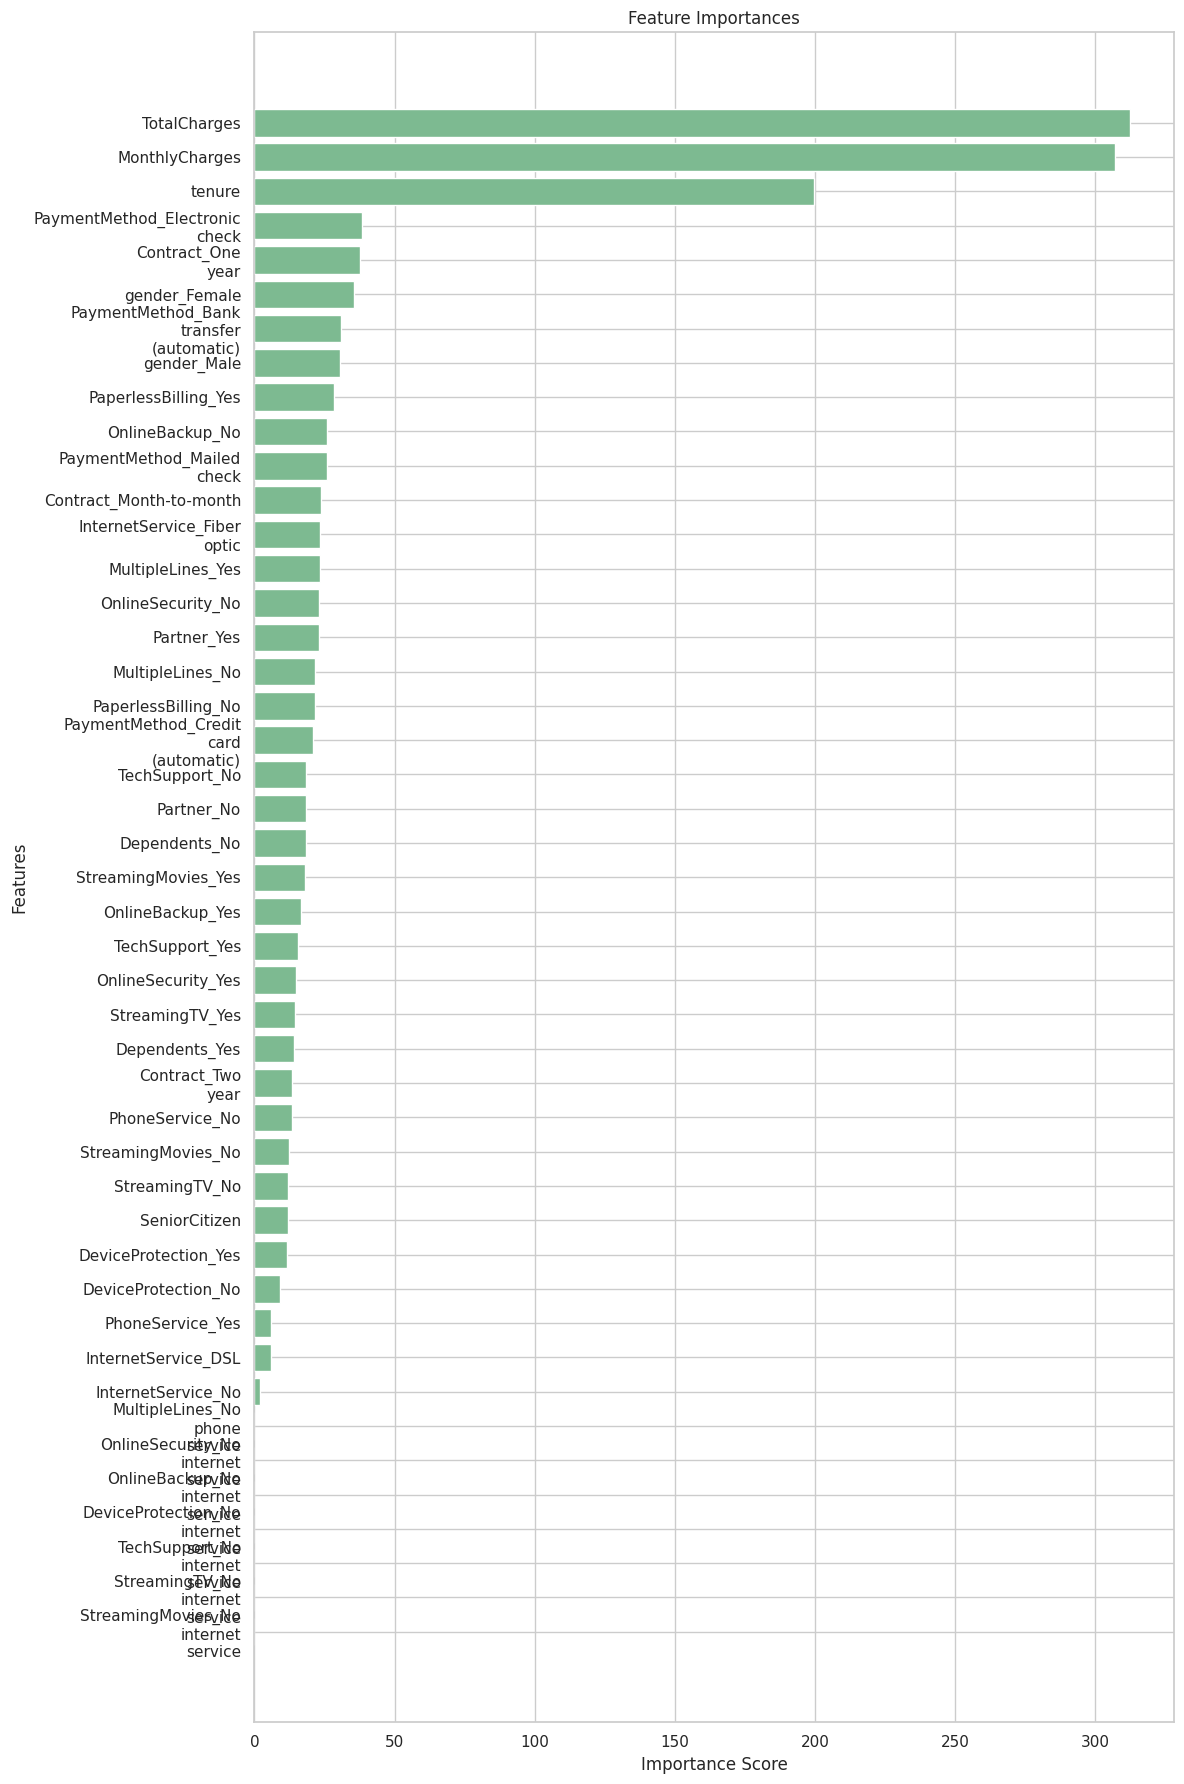

In [ ]:
# Extract, Order, and Plot Feature Importances
if combined_importance is not None:
    if feature_names is not None:
        print("Plotting with feature names.")
        ordered_features = order_feature_importances(combined_importance, feature_names)
    else:
        print("Feature names not available; plotting with indices.")
        ordered_features = order_feature_importances(combined_importance)

    # Display ordered features
    print("Ordered Feature Importances:")
    for feature, importance in ordered_features:
        print(f"{feature}: {importance}")

    # Plot
    plot_feature_importance([imp for _, imp in ordered_features], [name for name, _ in ordered_features])
else:
    print("Feature importance extraction failed.")

In [ ]:
pip install --upgrade keras


In [ ]:
pip install scikeras

  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
Using cached keras-3.6.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 3.6.0 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.12.0 which is incompatible.


In [ ]:
pip install tensorflow==2.12.0
